# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.12


In [2]:
# Imports
import numpy as np
import pandas as pd
import datetime as dt

from matplotlib import pyplot
import plotly.express as px
from plotly import graph_objects

from pandas_datareader import data as web

import yfinance as yf

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -p numpy,pandas,matplotlib,plotly,pandas_datareader,yfinance

numpy            : 1.21.5
pandas           : 1.4.2
matplotlib       : 3.5.1
plotly           : 5.6.0
pandas_datareader: 0.10.0
yfinance         : 0.2.17



#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [4]:
%%time

# Google, IBM e Microsoft
ativos = ['GOOG', 'IBM', 'MSFT']
dt_ini, dt_fim = '2021-01-01', '2023-01-07'
yf.pdr_override()
data = web.DataReader(ativos, dt_ini, dt_fim)
data.head()

[*********************100%***********************]  3 of 3 completed
CPU times: total: 281 ms
Wall time: 949 ms


Adj Close                              Close              \
                 GOOG         IBM        MSFT       GOOG         IBM   
Date                                                                   
2021-01-04  86.412003  106.178658  213.342026  86.412003  118.489487   
2021-01-05  87.045998  108.063400  213.547821  87.045998  120.592735   
2021-01-06  86.764503  110.761978  208.010635  86.764503  123.604210   
2021-01-07  89.362503  110.504959  213.930023  89.362503  123.317398   
2021-01-08  90.360497  110.110909  215.233459  90.360497  122.877632   

                             High                                Low  \
                  MSFT       GOOG         IBM        MSFT       GOOG   
Date                                                                   
2021-01-04  217.690002  88.032501  120.382408  223.000000  85.392502   
2021-01-05  217.899994  87.383499  121.108986  218.520004  85.900749   
2021-01-06  212.250000  87.400002  126.080307  216.490005  84.949997   
2021-01-07  218.289993  89.419998  124.722755  219.339996  86.852501   
2021-01-08  219.619995  90.491997  123.632889  220.580002  88.676750   

                                         Open                          \
                   IBM        MSFT       GOOG         IBM        MSFT   
Date                                                                    
2021-01-04  117.629066  214.809998  87.876999  120.315491  222.529999   
2021-01-05  119.130020  215.699997  86.250000  119.512428  217.259995   
2021-01-06  121.147224  211.940002  85.131500  121.319313  212.169998   
2021-01-07  122.619499  213.710007  87.002998  124.321220  214.039993   
2021-01-08  121.395790  217.029999  89.399002  122.915871  218.679993   

              Volume                     
                GOOG      IBM      MSFT  
Date                                     
2021-01-04  38038000  5417443  37130100  
2021-01-05  22906000  6395872  23823000  
2021-01-06  52042000  8322708  35930700  
2021-01-07  45300000  4714740  27694500  
2021-01-08  41012000  4891305  22956200

In [5]:
# Salvando em csv
data.to_csv('yahoo_finance.csv')

#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

In [6]:
amplitude = data['High'] - data['Low']
amplitude.head()

,GOOG,IBM,MSFT
Date,,,
2021-01-04,2.639999,2.753342,8.190002
2021-01-05,1.482750,1.978966,2.820007
2021-01-06,2.450005,4.933083,4.550003
2021-01-07,2.567497,2.103256,5.629990
2021-01-08,1.815247,2.237099,3.550003


In [7]:
amplitude_vertical = amplitude.stack().reset_index()
amplitude_vertical.columns = ['data', 'ativo', 'valor']

amplitude_vertical.head()

,data,ativo,valor
0,2021-01-04,GOOG,2.639999
1,2021-01-04,IBM,2.753342
2,2021-01-04,MSFT,8.190002
3,2021-01-05,GOOG,1.482750
4,2021-01-05,IBM,1.978966


In [10]:
# PLot
fig = px.line(amplitude_vertical, x='data', y='valor', color='ativo', template='plotly_white')
fig.show()

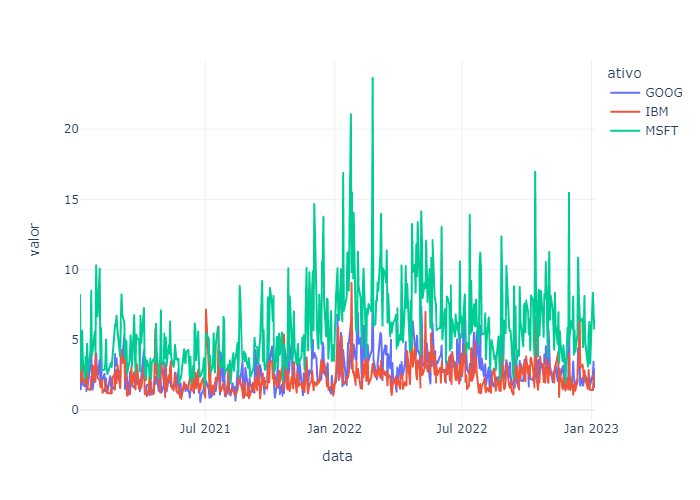

In [11]:
# Para mostrar o gráfico no Github
fig.show('png')

**Resposta:**

Podemos observar que durante o período de 2 anos, as ações da Microsoft apresentaram uma maior volatilidade em comparação aos outros ativos.